In [1]:
import pandas as pd

In [2]:
IDRs = pd.read_csv("./data/TAIR10/IDRs.csv", sep='\t')
IDRs["Length"] = IDRs["Sequence"].apply(len)
IDRs.head()

,Entry,Start,End,Sequence,ConfidenceScore,Length
0,A0A0A7EPL0,0,14,MVIPATSRFGFRAEF,"[61.39, 62.26, 63.1, 61.71, 59.13, 59.14, 54.3...",15
1,A0A0A7EPL0,366,846,ENDEDVELVPETTHDHGDPNSFINLGPTVKNPARDENEMETSTQVE...,"[58.84, 45.42, 41.95, 41.11, 41.48, 48.53, 44....",481
2,A0A178VEK7,123,293,DASSSSFNPKSSSSHRLKGKNVKPIRQSSQGFGLVEEEVTVSSSCS...,"[64.46, 63.41, 61.52, 61.63, 60.86, 61.98, 57....",171
3,A0A178WF56,0,70,MAQYHQQHEMKQTMAETQYVTAPPPMGYPVMMKDSPQTVQPPHEGQ...,"[56.81, 55.75, 57.62, 56.91, 59.69, 63.41, 58....",71
4,A0A1I9LMX5,18,242,QTPITTEARSLRKTNDQDHFKAGFTDDFVPTSPGNSPGVGHKKGNV...,"[64.54, 61.41, 67.58, 64.03, 61.82, 58.75, 67....",225


In [3]:
uniprot = pd.read_csv("data/TAIR10/ArabidopsisUniprot.tsv", sep="\t")
uniprot = uniprot[uniprot['AlphaFoldDB'].notnull()] #remove empty AlphaFoldDB entries
uniprot.head()

,Entry,Entry Name,Gene Names,AlphaFoldDB,Protein names,Gene Names (ordered locus),Sequence
0,A0A0A7EPL0,PIAL1_ARATH,PIAL1 EMB3001 At1g08910 F7G19.21,A0A0A7EPL0;,E4 SUMO-protein ligase PIAL1 (EC 2.3.2.-) (Pro...,At1g08910,MVIPATSRFGFRAEFNTKEFQASCISLANEIDAAIGRNEVPGNIQE...
1,A0A178VEK7,DUO1_ARATH,DUO1 MYB125 At3g60460 T8B10.120,A0A178VEK7;,Transcription factor DUO1 (Myb-related protein...,At3g60460,MRKMEAKKEEIKKGPWKAEEDEVLINHVKRYGPRDWSSIRSKGLLQ...
2,A0A178WF56,CSTM3_ARATH,CYSTM3 At1g56060 T6H22.17,A0A178WF56;,Protein CYSTEINE-RICH TRANSMEMBRANE MODULE 3 (...,At1g56060,MAQYHQQHEMKQTMAETQYVTAPPPMGYPVMMKDSPQTVQPPHEGQ...
3,A0A1I9LMX5,PCEP9_ARATH,CEP9 At3g50610 T20E23.210,A0A1I9LMX5;,Precursor of CEP9 (PCEP9) [Cleaved into: C-ter...,At3g50610,MKLLSITLTSIVISMVFYQTPITTEARSLRKTNDQDHFKAGFTDDF...
4,A0A1I9LN01,LAF3_ARATH,LAF3 At3g55850 F27K19.30,A0A1I9LN01;,Protein LONG AFTER FAR-RED 3 (EC 3.5.-.-),At3g55850,MTGWYEFPVMIGFVSAAVFLLISVAYLPLLNDLYWSTLKSLTPPAG...


In [29]:
### Calculate Disorder scores 

In [5]:
four = {"L": "A", "V": "A", "I": "A", "M": "A", "C": "A",
        "A": "B", "G": "B", "S": "B", "T": "B", "P": "B",
        "F": "C", "Y": "C", "W": "C",
        "E": "D", "D": "D", "N": "D", "Q": "D", "K": "D", "R": "D", "H": "D"}

eight = {"L": "A", "V": "A", "I": "A", "M": "A", "C": "A",
         "A": "B", "G": "B",
         "S": "C", "T": "C",
         "P": "D",
         "F": "E", "Y": "E", "W": "E",
         "E": "F", "D": "F", "N": "F", "Q": "F",
         "K": "G", "R": "G",
         "H": "H"}

ten = {"L": "A", "V": "A", "I": "A", "M": "A",
       "C": "B",
       "A": "C",
       "G": "D",
       "S": "E", "T": "E",
       "P": "F",
       "F": "G", "Y": "G", "W": "G",
       "E": "H", "D": "H", "N": "H", "Q": "H",
       "K": "I", "R": "I",
       "H": "J"}

twelve = {"L": "A", "V": "A", "I": "A", "M": "A",
          "C": "B",
          "A": "C",
          "G": "D",
          "S": "E", "T": "E",
          "P": "F",
          "F": "G", "Y": "G",
          "W": "H",
          "E": "I", "Q": "I",
          "D": "J", "N": "J",
          "K": "K", "R": "K",
          "H": "L"}

fifteen = {"L": "A", "V": "A", "I": "A", "M": "A",
           "C": "B",
           "A": "C",
           "G": "D",
           "S": "E",
           "T": "F",
           "P": "G",
           "F": "H", "Y": "H",
           "W": "I",
           "E": "J",
           "Q": "K",
           "D": "L",
           "N": "M",
           "K": "N", "R": "N",
           "H": "O"}

eighteen = {"L": "A", "M": "A",
            "V": "B", "I": "B",
            "C": "C",
            "A": "D",
            "G": "E",
            "S": "F",
            "T": "G",
            "P": "H",
            "F": "I",
            "Y": "J",
            "W": "K",
            "E": "L",
            "D": "M",
            "N": "N",
            "Q": "O",
            "K": "P", 
            "R": "Q",
            "H": "R"}
"""
four     - [(LVIMC), (AGSTP), (FYW), (EDNQKRH)]
eight    - [(LVIMC), (AG), (ST), (P), (FYW), (EDNQ), (KR), (H)]
ten      - [(LVIM), (C), (A), (G), (ST), (P), (FYW), (EDNQ), (KR), (H)]
twelve   - [(LVIM), (C), (A), (G), (ST), (P), (FY), (W), (EQ), (DN), (KR), (H)]
fifteen  - [(LVIM), (C), (A), (G), (S), (T), (P), (FY), (W), (E), (Q), (D), (N), (KR), (H)]
eighteen - [(LM), (VI), (C), (A), (G), (S), (T), (P), (F), (Y), (W), (E), (D), (N), (Q), (K), (R), (H)]
"""

'\nfour     - [(LVIMC), (AGSTP), (FYW), (EDNQKRH)]\neight    - [(LVIMC), (AG), (ST), (P), (FYW), (EDNQ), (KR), (H)]\nten      - [(LVIM), (C), (A), (G), (ST), (P), (FYW), (EDNQ), (KR), (H)]\ntwelve   - [(LVIM), (C), (A), (G), (ST), (P), (FY), (W), (EQ), (DN), (KR), (H)]\nfifteen  - [(LVIM), (C), (A), (G), (S), (T), (P), (FY), (W), (E), (Q), (D), (N), (KR), (H)]\neighteen - [(LM), (VI), (C), (A), (G), (S), (T), (P), (F), (Y), (W), (E), (D), (N), (Q), (K), (R), (H)]\n'

In [6]:
def reduce_alphabet(sequence):
    def translate(sequence, reduction_dict):
        return ''.join([reduction_dict.get(res, res) for res in sequence])
    
    reduced_seq_four = translate(sequence, four)
    reduced_seq_eight = translate(sequence, eight)
    reduced_seq_ten = translate(sequence, ten)
    reduced_seq_twelve = translate(sequence, twelve)
    reduced_seq_fifteen = translate(sequence, fifteen)
    reduced_seq_eighteen = translate(sequence, eighteen)

    return reduced_seq_four, reduced_seq_eight, reduced_seq_ten, reduced_seq_twelve, reduced_seq_fifteen, reduced_seq_eighteen

IDRs[["Four", "Eight", "Ten", "Twelve", "Fifteen", "Eighteen"]] = IDRs["Sequence"].apply(reduce_alphabet).apply(pd.Series)

In [7]:
CAM5_IDR = "AAKRSSNSAEYKEKNGRRKSHCRIL"

CAM5_reduced_seq_four, CAM5_reduced_seq_eight, CAM5_reduced_seq_ten, CAM5_reduced_seq_twelve, CAM5_reduced_seq_fifteen, CAM5_reduced_seq_eighteen = reduce_alphabet(CAM5_IDR)


In [8]:
def min_hamming_distance(str1, str2):
    """
    Calculate the minimum Hamming distance between 'small' and all substrings of 'large' of the same length.
    Returns the minimum distance and the substring in 'large' with that distance.
    """
    if len(str1) <= len(str2):
        small, large = str1, str2
    else:
        small, large = str2, str1

    min_dist = None
    min_sub = None
    len_small = len(small)
    for i in range(len(large) - len_small + 1):
        sub = large[i:i+len_small]
        dist = sum(a != b for a, b in zip(small, sub))
        if (min_dist is None) or (dist < min_dist):
            min_dist = dist
            min_sub = sub
    return min_dist, min_sub

In [9]:
IDRs["CAM5 Hamming Four"] = IDRs["Four"].apply(lambda x: min_hamming_distance(CAM5_reduced_seq_four, x))
IDRs["CAM5 Hamming Eight"] = IDRs["Eight"].apply(lambda x: min_hamming_distance(CAM5_reduced_seq_eight, x))
IDRs["CAM5 Hamming Ten"] = IDRs["Ten"].apply(lambda x: min_hamming_distance(CAM5_reduced_seq_ten, x))
IDRs["CAM5 Hamming Twelve"] = IDRs["Twelve"].apply(lambda x: min_hamming_distance(CAM5_reduced_seq_twelve, x))
IDRs["CAM5 Hamming Fifteen"] = IDRs["Fifteen"].apply(lambda x: min_hamming_distance(CAM5_reduced_seq_fifteen, x))
IDRs["CAM5 Hamming Eighteen"] = IDRs["Eighteen"].apply(lambda x: min_hamming_distance(CAM5_reduced_seq_eighteen, x))
IDRs.to_csv("data/IDR_hamming_distances_CAM5.csv", index = False)

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
IDRs.sort_values("CAM5 Hamming Twelve")[["Entry", "Sequence", "CAM5 Hamming Twelve"]].drop_duplicates()[:20]

,Entry,Sequence,CAM5 Hamming Twelve
177437,A0A654EWJ3,MMAKRRGKRVMAAKRSSNSAEYKEKNGRRKSHCRIL,"(0, CCKKEEJECIGKIKJDKKKELBKAA)"
82795,F4IVN6,MAKRRGKRVMAAKRSSNSAEYKEKNGRRKSHCRIL,"(0, CCKKEEJECIGKIKJDKKKELBKAA)"
121931,A0A178VRH9,MAKRRGKRAMTTKRSSNSAEYKEKNGRRKSHCCIL,"(3, EEKKEEJECIGKIKJDKKKELBBAA)"
85379,O23693,QQTGTSNGAQVKPRDG,"(7, CCKKEEJECIGKIKJD)"
2406,P36428,ARERSRSAQNKQAGGA,"(7, CKKEEJECIGKIKJDK)"
18404,A0A178W6W4,ARERSRSAQNKQAGGA,"(7, CKKEEJECIGKIKJDK)"
19557,A0A5S9WNF0,ARERSRSAQNKQAGGA,"(7, CKKEEJECIGKIKJDK)"
22079,F4I4Z2,ARERSRSAQNKQAGGA,"(7, CKKEEJECIGKIKJDK)"
20223,A0A654EHS4,ARERSRSAQNKQAGGA,"(7, CKKEEJECIGKIKJDK)"
232108,O80861,MISMEEKNTYGKRKT,"(7, EJECIGKIKJDKKKE)"


<Axes: ylabel='Count'>

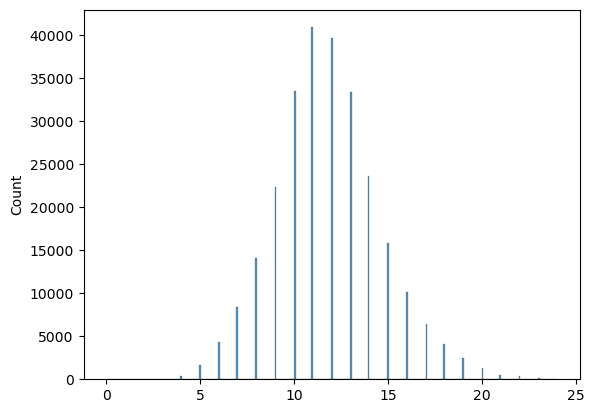

In [25]:
sns.histplot([x[0] for x in IDRs["CAM5 Hamming Four"]])